In [6]:
from google.colab import files
uploaded = files.upload()




Saving Customers.csv to Customers (2).csv


In [7]:
!pip install seaborn scikit-learn scikit-learn-extra kmodes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.3 MB/s eta 0:00:00


Saving Customers.csv to Customers (4).csv


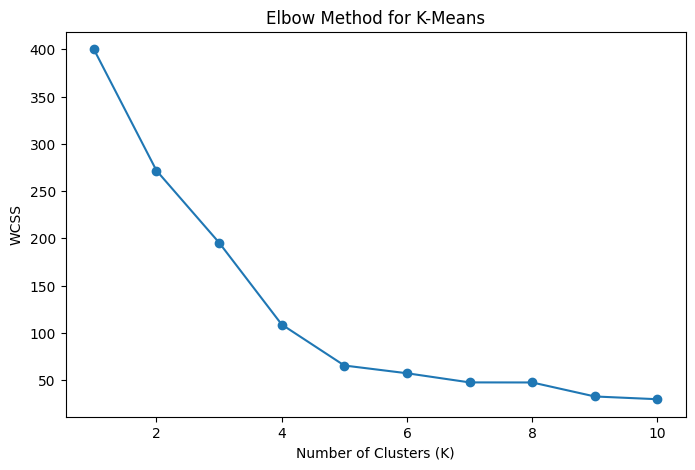

K-Means Silhouette Score: 0.5546571631111091
K-Median Silhouette Score: 0.5538037318866426
K-Medoids Silhouette Score: 0.44764405993975875
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 330.0
K-Modes Clustering Done


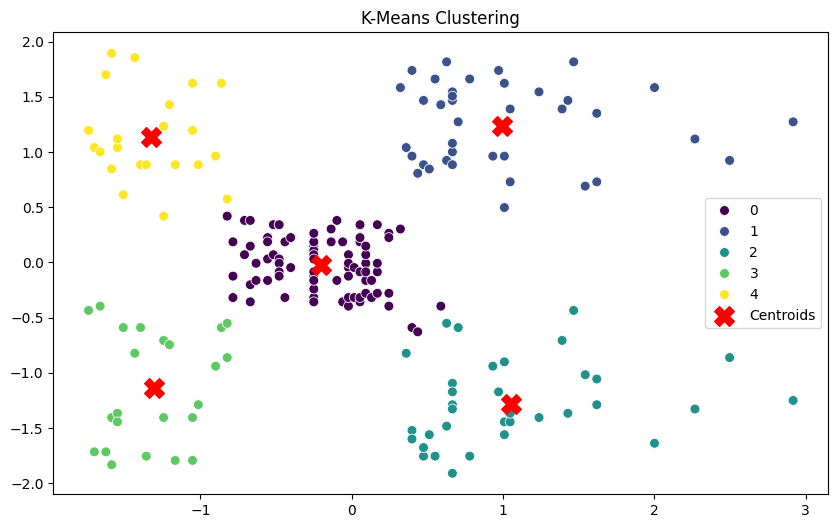

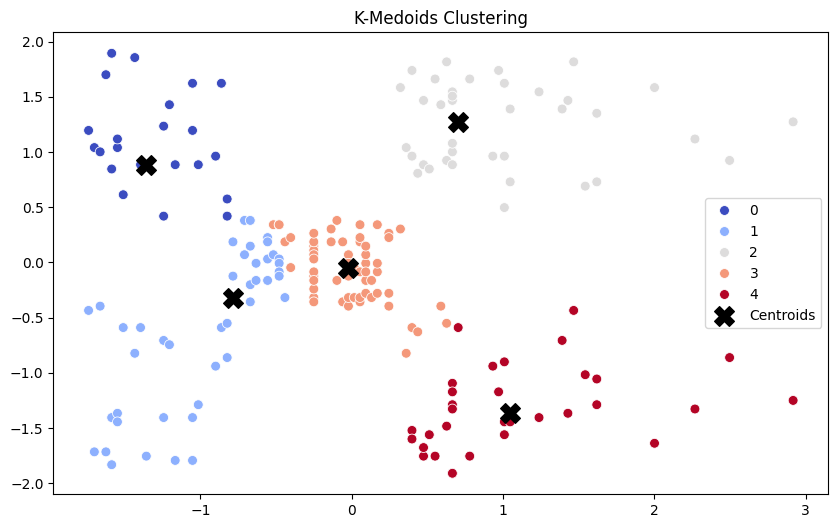

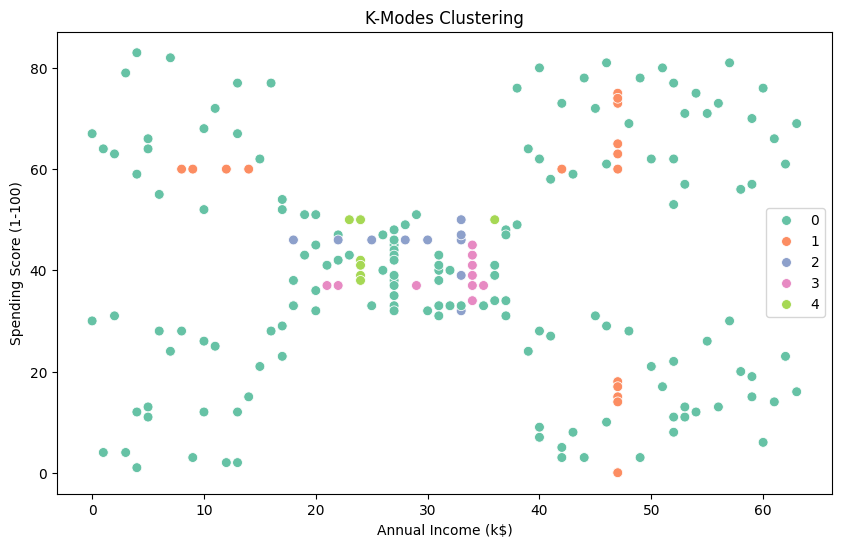

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cityblock
import numpy as np
from google.colab import files

# Upload file manually
uploaded = files.upload()

# Load and preprocess data
customer_data = pd.read_csv('Customers.csv')
customer_data.drop(columns=['CustomerID', 'Gender', 'Age'], inplace=True)
scaler = StandardScaler()
X = scaler.fit_transform(customer_data)

# K-Means Clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Elbow Method for K-Means
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Train K-Means with optimal K (assume 5 for now)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y_kmeans = kmeans.fit_predict(X)
print("K-Means Silhouette Score:", silhouette_score(X, Y_kmeans))

# K-Median Clustering (using K-Medoids with Manhattan Distance)
kmedians = KMedoids(n_clusters=5, metric='manhattan', random_state=0)
Y_kmedians = kmedians.fit_predict(X)
print("K-Median Silhouette Score:", silhouette_score(X, Y_kmedians))

# K-Medoids Clustering
kmedoids = KMedoids(n_clusters=5, random_state=0)
Y_kmedoids = kmedoids.fit_predict(X)
print("K-Medoids Silhouette Score:", silhouette_score(X, Y_kmedoids))

# K-Mode Clustering (Applying on Customers.csv as categorical data)
kcustomer_data = customer_data.apply(lambda x: x.astype('category').cat.codes)
kmodes = KModes(n_clusters=5, init='Cao', n_init=5, verbose=1)
Y_kmodes = kmodes.fit_predict(kcustomer_data)
print("K-Modes Clustering Done")

# Visualization of K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y_kmeans, palette='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Visualization of K-Medoids Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y_kmedoids, palette='coolwarm', s=50)
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('K-Medoids Clustering')
plt.legend()
plt.show()

# Visualization of K-Modes Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=kcustomer_data.iloc[:, 0], y=kcustomer_data.iloc[:, 1], hue=Y_kmodes, palette='Set2', s=50)
plt.title('K-Modes Clustering')
plt.legend()
plt.show()


Saving Customers.csv to Customers (7).csv


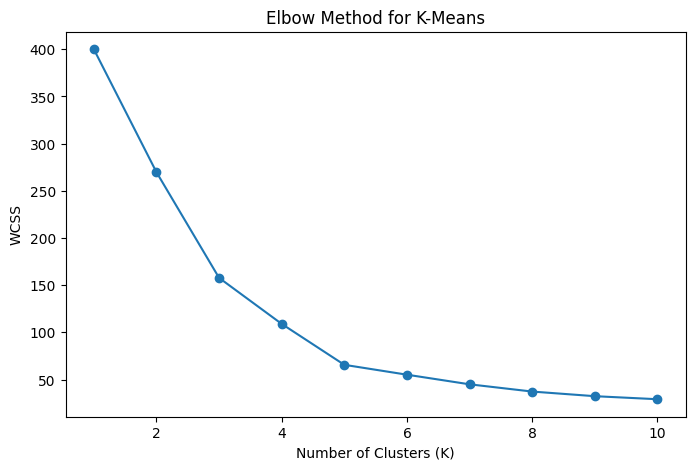

K-Means Silhouette Score: 0.5547
K-Medians Silhouette Score: 0.5538
K-Medoids Silhouette Score: 0.4476
K-Modes Clustering Cost: 330.0


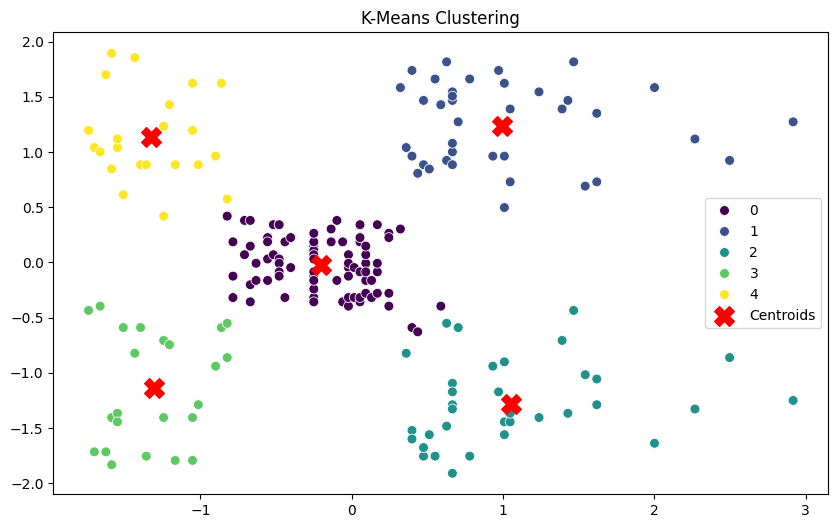

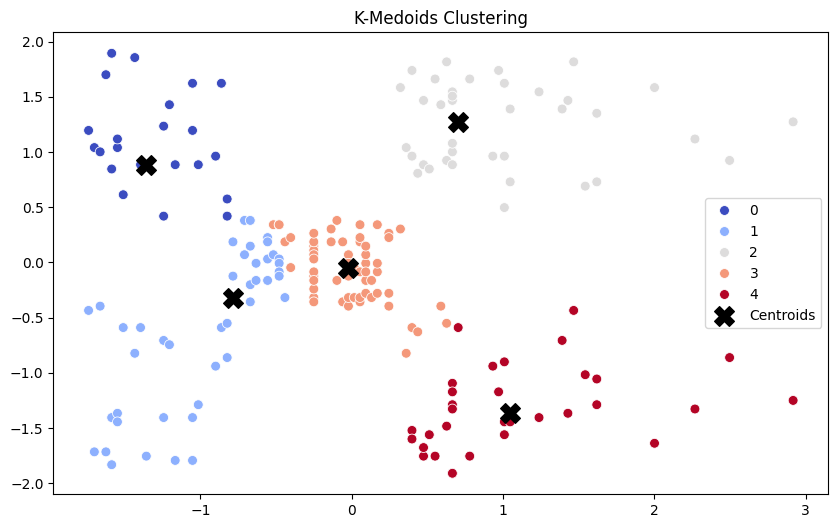

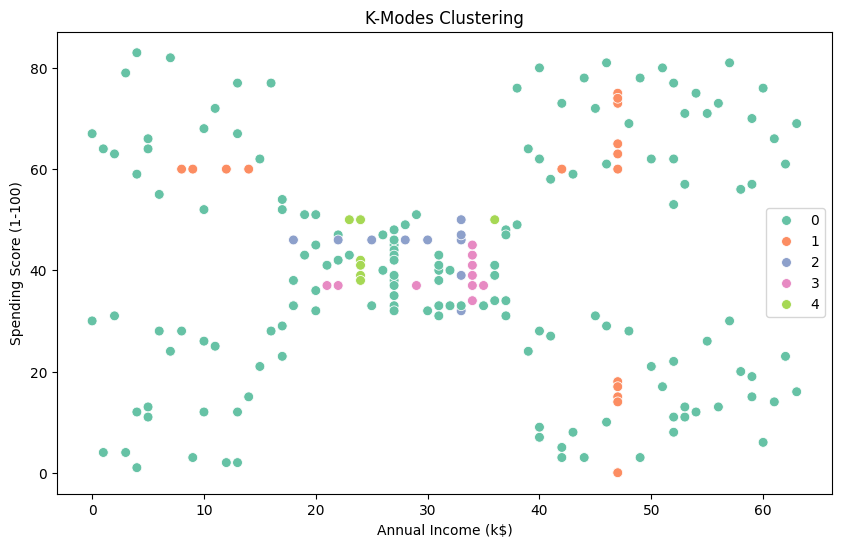

In [13]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
import numpy as np
from google.colab import files

# Step 1: Load Data
uploaded = files.upload()
customer_data = pd.read_csv('Customers.csv')

# Drop non-relevant columns
customer_data.drop(columns=['CustomerID', 'Gender', 'Age'], inplace=True)

# Step 2: Normalize numerical data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(customer_data)

# Step 3: Apply K-Means Clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Elbow Method Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Train K-Means with optimal K (assuming 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
Y_kmeans = kmeans.fit_predict(X)
silhouette_kmeans = silhouette_score(X, Y_kmeans)

# Step 4: Apply K-Median Clustering (Using K-Medoids)
kmedians = KMedoids(n_clusters=5, metric='manhattan', random_state=0)
Y_kmedians = kmedians.fit_predict(X)
silhouette_kmedians = silhouette_score(X, Y_kmedians)

# Step 5: Apply K-Medoids Clustering (Euclidean Distance)
kmedoids = KMedoids(n_clusters=5, metric='euclidean', random_state=0)
Y_kmedoids = kmedoids.fit_predict(X)
silhouette_kmedoids = silhouette_score(X, Y_kmedoids)

# Step 6: Apply K-Modes Clustering (For Categorical Data)
kcustomer_data = customer_data.apply(lambda x: x.astype('category').cat.codes)
kmodes = KModes(n_clusters=5, init='Cao', n_init=5, verbose=0)  # Suppress output
Y_kmodes = kmodes.fit_predict(kcustomer_data)
kmodes_cost = kmodes.cost_  # Store cost without printing

# Step 7: Print Final Clustering Performance Metrics
print(f"K-Means Silhouette Score: {silhouette_kmeans:.4f}")
print(f"K-Medians Silhouette Score: {silhouette_kmedians:.4f}")
print(f"K-Medoids Silhouette Score: {silhouette_kmedoids:.4f}")
print(f"K-Modes Clustering Cost: {kmodes_cost}")

# Step 8: Visualization of K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y_kmeans, palette='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Step 9: Visualization of K-Medoids Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y_kmedoids, palette='coolwarm', s=50)
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('K-Medoids Clustering')
plt.legend()
plt.show()

# Step 10: Visualization of K-Modes Clustering (Categorical Data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=kcustomer_data.iloc[:, 0], y=kcustomer_data.iloc[:, 1], hue=Y_kmodes, palette='Set2', s=50)
plt.title('K-Modes Clustering')
plt.legend()
plt.show()


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.linear_model import LogisticRegression

# Load Iris Dataset
data = load_iris()
X = data.data
y = data.target

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define RBF Kernel Function (Gaussian)
def rbf_kernel(X, centers, sigma=1.0):
    return np.exp(-cdist(X, centers, 'sqeuclidean') / (2 * sigma**2))

# Select RBF centers using K-Means
k = 10  # Number of RBF centers
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)
centers = kmeans.cluster_centers_

# Compute RBF Kernel for Training and Testing
sigma = np.mean(cdist(centers, centers, 'euclidean'))
X_train_rbf = rbf_kernel(X_train, centers, sigma)
X_test_rbf = rbf_kernel(X_test, centers, sigma)

# Train Logistic Regression on Transformed Features
model = LogisticRegression()
model.fit(X_train_rbf, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test_rbf)
accuracy = accuracy_score(y_test, y_pred)
print(f'RBF Network Accuracy: {accuracy:.4f}')

# Compare with Standard Logistic Regression
std_model = LogisticRegression()
std_model.fit(X_train, y_train)
y_pred_std = std_model.predict(X_test)
std_accuracy = accuracy_score(y_test, y_pred_std)
print(f'Standard Logistic Regression Accuracy: {std_accuracy:.4f}')

RBF Network Accuracy: 0.9333
Standard Logistic Regression Accuracy: 1.0000
